In [2]:
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
df = pd.read_csv("data/bakery.csv")
print(df.shape)
df.head()

(21293, 4)


,Date,Time,Transaction,Item
0,30/10/2016,9:58:11,1,Bread
1,30/10/2016,10:05:34,2,Scandinavian
2,30/10/2016,10:05:34,2,Scandinavian
3,30/10/2016,10:07:57,3,Hot chocolate
4,30/10/2016,10:07:57,3,Jam


In [4]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [5]:
df["Item"].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [6]:
df["Item"].value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

In [7]:
# Exclude NONE
df = df[df["Item"] != 'NONE']
print(df.shape)
df.head()

(20507, 4)


,Date,Time,Transaction,Item
0,30/10/2016,9:58:11,1,Bread
1,30/10/2016,10:05:34,2,Scandinavian
2,30/10/2016,10:05:34,2,Scandinavian
3,30/10/2016,10:07:57,3,Hot chocolate
4,30/10/2016,10:07:57,3,Jam


In [8]:
df_top10 = pd.DataFrame(df['Item'].value_counts()).reset_index().rename(columns = {'index': 'Item', 'Item':'Freq'}).iloc[:10]
df_top10                        

,Item,Freq
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


### Top 10 product of selling items

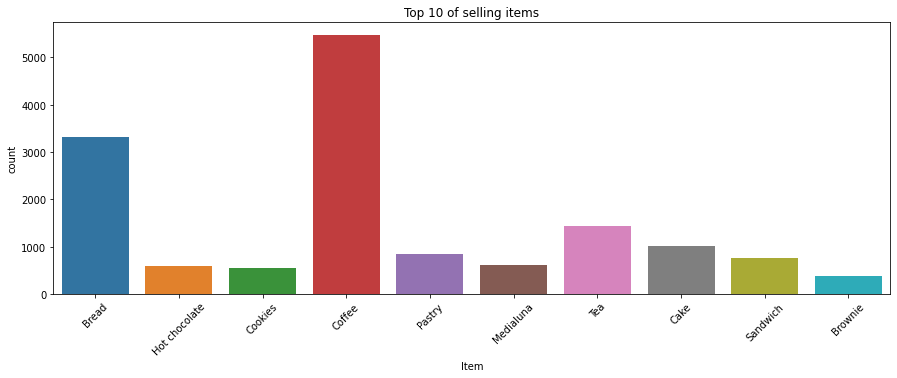

In [9]:
items_name = df_top10["Item"].tolist()
plt.figure(figsize = (15,5))
sns.countplot(x='Item', data = df[df['Item'].isin(items_name)])

plt.xticks(rotation=45)
plt.title("Top 10 of selling items")
plt.show()

In [17]:
df = df.groupby(["Transaction", "Item"])["Item"].count().unstack().reset_index().fillna(0).set_index("Transaction")
print(df.shape)
df.head()

(9465, 94)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,Fudge,Gift voucher,Gingerbread syrup,Granola,Hack the stack,Half slice Monster,Hearty & Seasonal,Honey,Hot chocolate,Jam,Jammie Dodgers,Juice,Keeping It Local,Kids biscuit,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def encode_units(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1
df = df.applymap(encode_units)
df = df.reset_index(drop=True)
print(df.shape)
df.head()

(9465, 94)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,Fudge,Gift voucher,Gingerbread syrup,Granola,Hack the stack,Half slice Monster,Hearty & Seasonal,Honey,Hot chocolate,Jam,Jammie Dodgers,Juice,Keeping It Local,Kids biscuit,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
features = list(df.columns)
print(len(features), 'items')

94 items


### The proportion of Purchase plot by product

number of features: 94


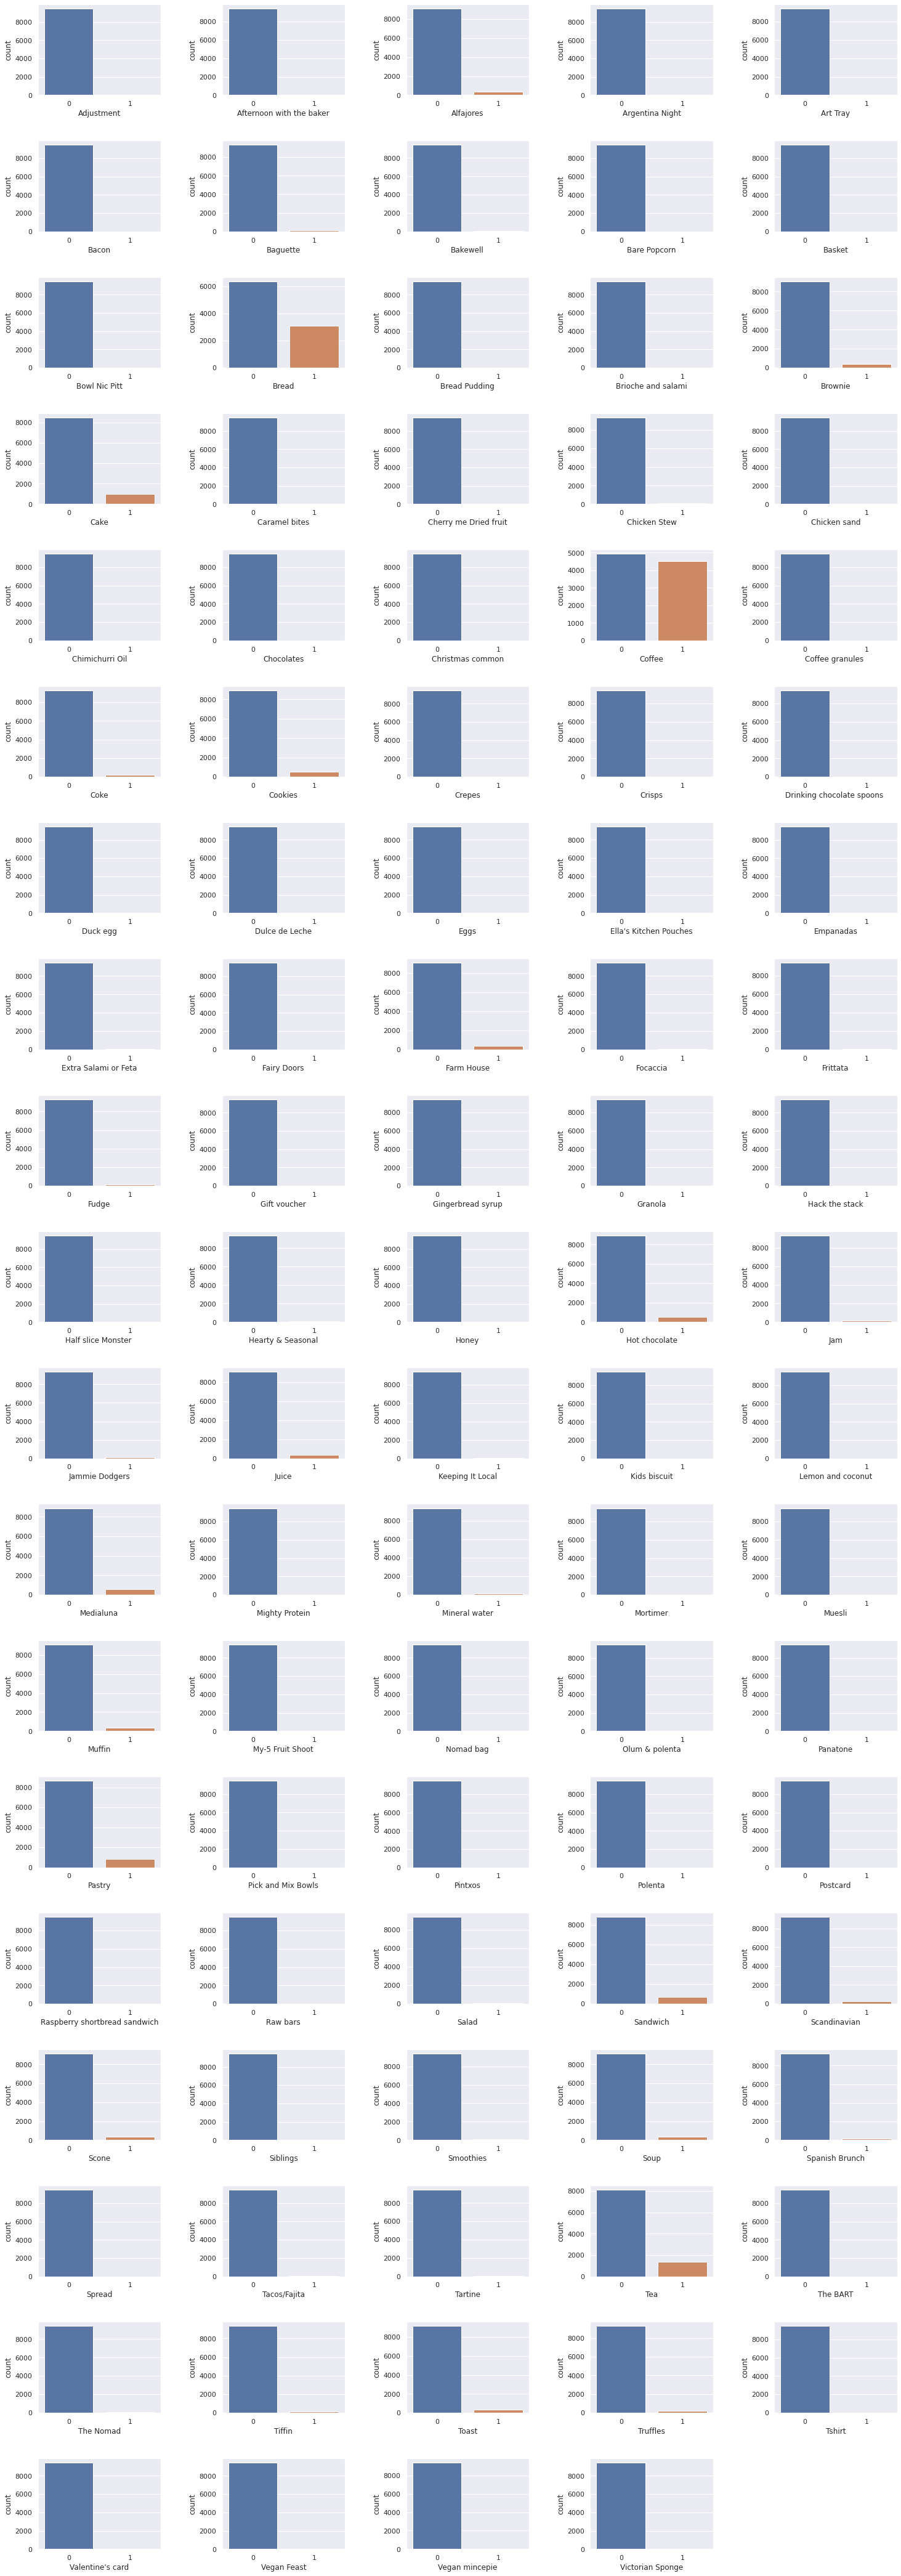

In [20]:
numfeat = len(features)
print('number of features:', len(features))
sns.set_theme(style='darkgrid')
columns = 5
row = int(np.ceil(numfeat/columns))
fig = plt.figure()
fig.set_size_inches(columns * 5, row * 4, forward=True)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()

for i, feat in enumerate(features):
    ax = fig.add_subplot(row, columns , i+1)
    sns.countplot(x=feat, data=df, ax=ax)

In [21]:
items_df = df.mean().sort_values(ascending=False).to_frame().reset_index().rename(columns = {0:'mean'})
items_df

,Item,mean
0,Coffee,0.478394
1,Bread,0.327205
2,Tea,0.142631
3,Cake,0.103856
4,Pastry,0.086107
5,Sandwich,0.071844
6,Medialuna,0.061807
7,Hot chocolate,0.058320
8,Cookies,0.054411
9,Brownie,0.040042


### Top 10 product of purchase

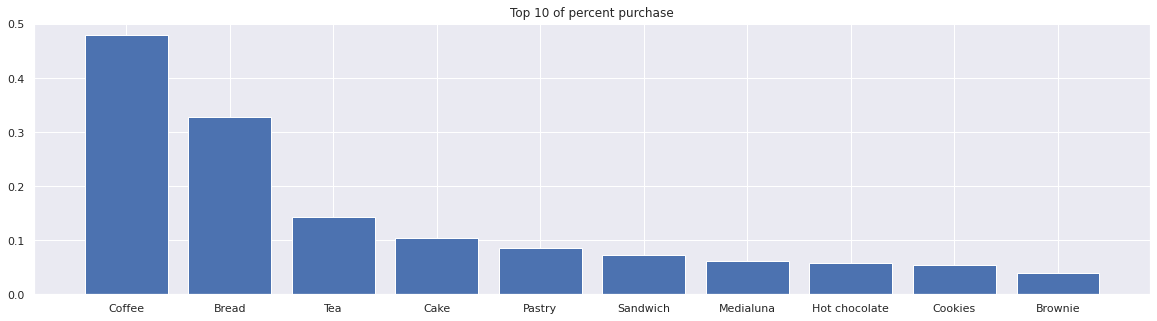

In [22]:
plt.figure(figsize=(20,5))
plt.bar(items_df["Item"][:10], items_df["mean"][:10])
plt.title("Top 10 of percent purchase")
plt.show()

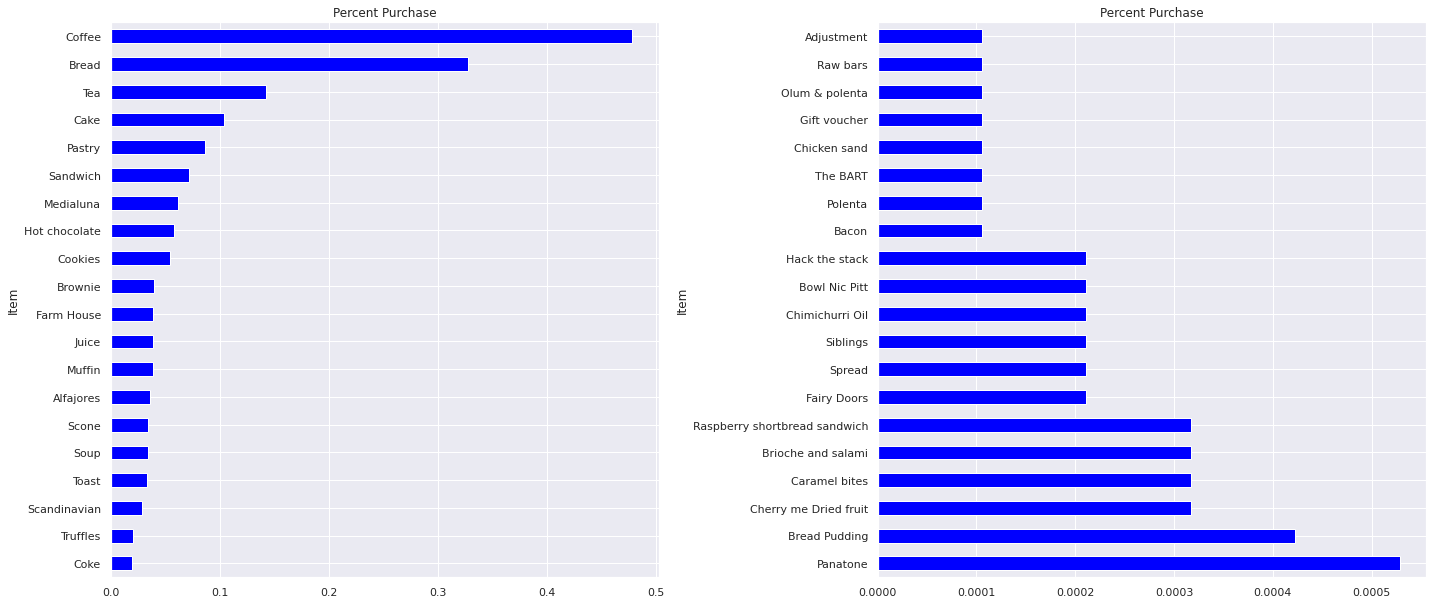

In [64]:
# The percentage of purchase by product
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(20, 8.5), tight_layout=True)
items_df[:20].sort_values('mean',ascending=True).plot.barh(x = 'Item', y='mean', stacked=True, color='blue', ax=ax[0], title='Percent Purchase', legend=False)
items_df[-20:].plot.barh(x = 'Item', y='mean', stacked=True, color='blue', ax=ax[1], title='Percent Purchase', legend=False)
plt.show()

<div class="alert alert-block alert-info">
<b>Association Rules</b>
</div>

In [25]:
from mlxtend.frequent_patterns import apriori, association_rules

In [29]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.8/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
5,0.012995,(Chicken Stew)
6,0.478394,(Coffee)
7,0.019440,(Coke)
8,0.054411,(Cookies)
9,0.039197,(Farm House)


### Metrics
* support(A) = P(A)
* confidence(A->B) = P(A|B)
* lift(A->B) = confidence(A->B) / support(B)
* leverage(A->B) = support(A->B) - (support(A) * support(B))
* conviction(A->B) = (1-support(B)) / (1 - confidence(A->B))

In [30]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.sort_values(by = ['lift', 'confidence'], ascending=False, inplace = True)
print(rules.shape)
rules

(42, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,"(Coffee, Tea)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962
40,(Cake),"(Coffee, Tea)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
11,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
10,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
31,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
37,(Pastry),"(Bread, Coffee)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033
36,"(Bread, Coffee)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749


In [32]:
rules[['lift', 'confidence', 'support']].describe().T

,count,mean,std,min,25%,50%,75%,max
lift,42.0,1.261089,0.267217,1.022193,1.083723,1.130235,1.402222,1.937977
confidence,42.0,0.245089,0.214038,0.022747,0.075144,0.127237,0.503126,0.704403
support,42.0,0.023088,0.012432,0.010037,0.011410,0.019651,0.029160,0.054728


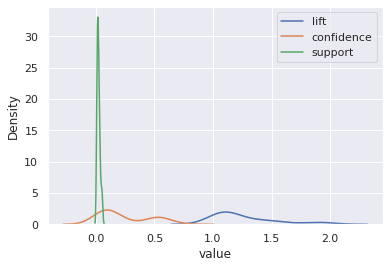

In [33]:
for i in ['lift', 'confidence', 'support']:
    sns.kdeplot(rules[i], label=i)
plt.xlabel('value')
plt.legend()
plt.show()

In [34]:
rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


### Visualize Rules

In [36]:
import networkx as nx

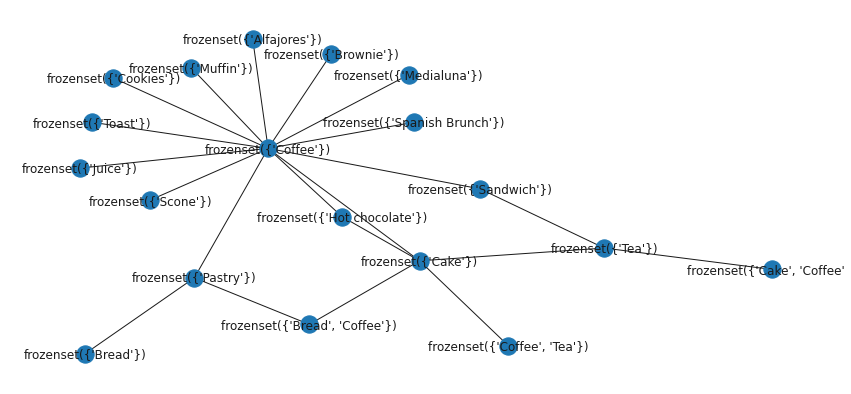

In [39]:
fig, ax = plt.subplots(figsize = (15,7))
GA = nx.from_pandas_edgelist(rules, source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels=True)
plt.show()

### Cosine Similarity

In [45]:
item_item_matrix = pd.DataFrame(index=features, columns = features)
print(item_item_matrix.shape)

(94, 94)


In [44]:
from scipy.spatial.distance import cosine

In [46]:
for i in range(len(features)):
    for j in range(len(features)):
        item_item_matrix.iloc[i,j] = 1-cosine(df.iloc[:,i], df.iloc[:,j])

In [48]:
links = item_item_matrix.rename_axis('related item', axis = 'columns').stack().reset_index()
links.columns = ['item', 'related item', 'value']
print(links.shape)
links.head()

(8836, 3)


,item,related item,value
0,Adjustment,Adjustment,1
1,Adjustment,Afternoon with the baker,0.0
2,Adjustment,Alfajores,0.0
3,Adjustment,Argentina Night,0.0
4,Adjustment,Art Tray,0.0


In [49]:
link_filtered = links.loc[(links['value']>0.1) & (links['item'] != links['related item'])]
print(link_filtered.shape)
link_filtered.head()

(114, 3)


,item,related item,value
97,Afternoon with the baker,Argentina Night,0.115278
211,Alfajores,Coffee,0.149032
283,Argentina Night,Afternoon with the baker,0.115278
381,Art Tray,Bacon,0.162221
420,Art Tray,Hack the stack,0.229416


In [51]:
link_filtered

,item,related item,value
97,Afternoon with the baker,Argentina Night,0.115278
211,Alfajores,Coffee,0.149032
283,Argentina Night,Afternoon with the baker,0.115278
381,Art Tray,Bacon,0.162221
420,Art Tray,Hack the stack,0.229416
474,Bacon,Art Tray,0.162221
780,Bare Popcorn,Crisps,0.119523
785,Bare Popcorn,Ella's Kitchen Pouches,0.108465
816,Bare Popcorn,Panatone,0.2
1049,Bread,Cake,0.126662


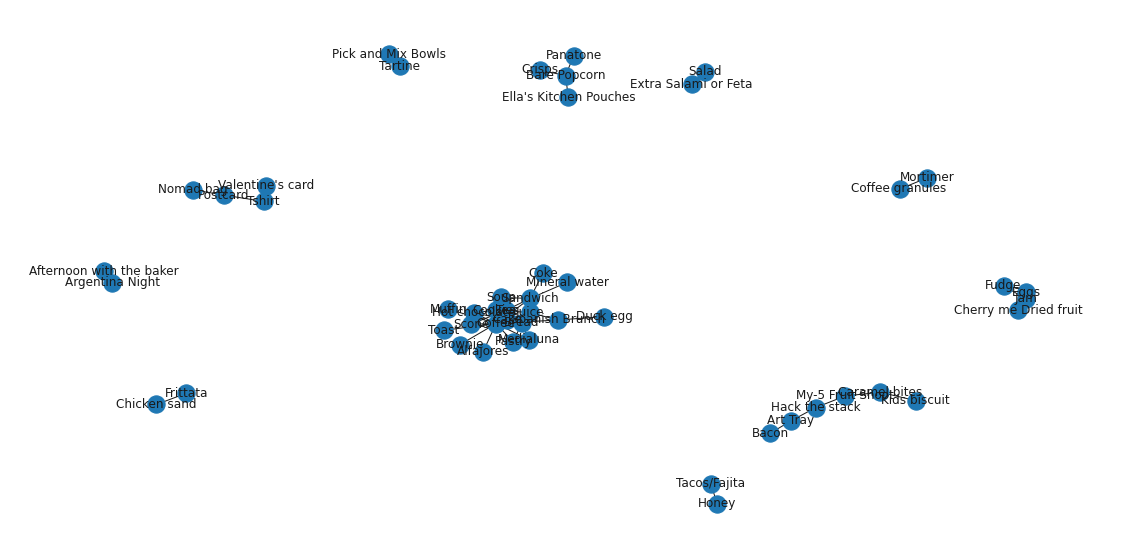

In [52]:
fig, ax = plt.subplots(figsize = (20,10))
GA = nx.from_pandas_edgelist(link_filtered, source = 'item', target = 'related item')
nx.draw(GA, with_labels=True)
plt.show()